# Compressed Sensing and Parallel Imaging

This example, originally written in MATLAB ([source](https://mrirecon.github.io/bart/examples.html#18)), demonstrates L1-ESPIRiT Recon of a human knee, data acquired with variable-density poisson-disc sampling.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#BART Interface
import bartpy.utils as utils
import bartpy.tools as bart

%matplotlib inline

In [2]:
# import K-Space Data

knee = utils.cfl.readcfl('data/knee')

# dimensions 0 1 2 3 where 3 is column dim
knee.shape

(1, 288, 236, 8)

In [3]:
# perform RSS along column dim (0 0 0 1)
ksp_rss = bart.rss(knee, 8)

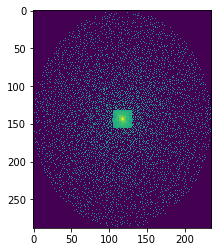

In [4]:
# visualize kspace data in matplotlib

plt.imshow(abs(ksp_rss.squeeze()) ** 0.125)

In [5]:
# first perform fft-based recon

fft_knee = bart.fft(knee, 6, i=True)
fft_knee_rss = bart.rss(fft_knee, 8)

In [7]:
# View PICS tool options, adopted from the comand line


help(bart.pics)

Help on function pics in module bartpy.tools.tools:

pics(kspace, sensitivities, l=None, r=None, R=None, c=None, s=None, i=None, t=None, n=None, N=None, g=None, G=None, p=None, I=None, b=None, e=None, H=None, D=None, F=None, J=None, T=None, W=None, d=None, O=None, o=None, u=None, C=None, q=None, f=None, m=None, w=None, S=None, L=None, K=None, B=None, P=None, a=None, M=None, lowmem=None)
    Parallel-imaging compressed-sensing reconstruction.
    
    :param kspace array:
    :param sensitivities array:
    :param l SPECIAL: toggle l1-wavelet or l2 regularization. 
    :param r float: regularization parameter 
    :param R SPECIAL: generalized regularization options (-Rh for help) 
    :param c bool: real-value constraint 
    :param s float: iteration stepsize 
    :param i int: max. number of iterations 
    :param t array: k-space trajectory 
    :param n bool: disable random wavelet cycle spinning 
    :param N bool: do fully overlapping LLR blocks 
    :param g bool: use GPU 
    :

In [8]:
# Calibrate maps and perform PICS reconstruction

knee_maps, _ = bart.ecalib(knee, c=0., m=1)
knee_l1 = bart.pics(knee, knee_maps, l=1, r=0.01)

In [9]:
knee_l1.shape

(1, 288, 236)

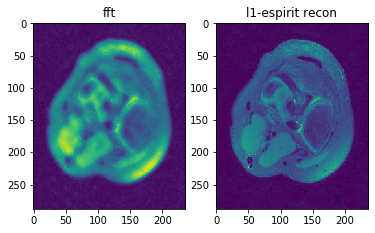

In [10]:
# Plot to compare 

fig, axs = plt.subplots(ncols=2)

axs[0].set_title('fft')
axs[0].imshow(abs(fft_knee_rss.squeeze()))

axs[1].set_title('l1-espirit recon')
axs[1].imshow(abs(knee_l1.squeeze()))